In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
from keras import backend as keras
from tensorflow import keras

import numpy as np

In [19]:
import os
all_cases = [x for x in os.listdir("dataset/chb-mit-scalp-eeg-database-1.0.0/") if "chb" in x]
test_cases = [x for x in os.listdir("dataset/chb-mit-scalp-eeg-database-1.0.0/") if "chb01" in x or "chb02" in x or "chb03" in x or "chb04" in x or "chb05" in x or "chb06" in x or "chb07" in x or "chb08" in x]
test_cases = [x for x in os.listdir("dataset/chb-mit-scalp-eeg-database-1.0.0/") if "chb02" in x or "chb03" in x or "chb04" in x or "chb05" in x or "chb07" in x or "chb08" in x or "chb09" in x]
cases = [x for x in os.listdir("dataset/chb-mit-scalp-eeg-database-1.0.0/") if not "chb01" in x and "chb" in x]
known_detectables = [x for x in os.listdir("dataset/chb-mit-scalp-eeg-database-1.0.0/") if "chb" in x and not \
                                           x == "chb04" and not x == "chb07" and not x == "chb09" and not x == "chb15" and not x == "chb17" and not x == "chb18" and not x == "chb20"]
# test_cases = [x for x in os.listdir("dataset/chb-mit-scalp-eeg-database-1.0.0/") if not "chb06" in x and "chb" in x]
print(known_detectables)

['chb01', 'chb02', 'chb03', 'chb05', 'chb06', 'chb08', 'chb10', 'chb11', 'chb12', 'chb13', 'chb14', 'chb16', 'chb19', 'chb21', 'chb22', 'chb23', 'chb24']


In [21]:
from seizure_sequence import SeizureSequence
test_cases = [x for x in os.listdir("dataset/chb-mit-scalp-eeg-database-1.0.0/") if "chb02" in x or "chb03" in x or "chb04" in x or "chb05" in x or "chb07" in x or "chb08" in x or "chb09" in x or "chb10" in x \
              or "chb11" in x]

chb06_sequence = SeizureSequence(1, "ml_processed_balanced_pre_ictal", ["chb06"], bias_positive=False)
seizure_sequence_balanced = SeizureSequence(1, "ml_processed_balanced_pre_ictal", test_cases, bias_positive=False)
whole_file_sequence = SeizureSequence(1, "ml_processed_pre_ictal", test_cases, bias_positive=False)
known_detectable_sequence = SeizureSequence(1, "ml_processed_balanced_pre_ictal/", known_detectables, bias_positive=False)
# data, labels = seizure_sequence.__getitem__(1)

In [22]:
from model import create_model, create_large_model, compile_model
model = compile_model(create_model())
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 21, 512)           393728    
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 10, 512)          0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 8, 256)            393472    
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 4, 256)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 2, 128)            98432     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 1, 128)          

1
2

In [32]:
# epoch_per_train_step = 500 
# history_after_chb06 = model.fit(chb06_sequence, epochs=100)
# accuracy = 0.5
# while accuracy == 0.5:
#     history = model.fit(seizure_sequence_balanced, epochs=350)
# # model.save("models/balanced.h5")
#     model = keras.models.load_model("models/balanced.h5")
#     history_after_whole_file = model.fit(whole_file_sequence, epochs=1)
#     # model.save("models/balanced_and_whole_file.h5")
#     # model = keras.models.load_model("models/balanced_and_whole_file.h5")
#     history_after_whole_file_and_balanced = model.fit(seizure_sequence_balanced, epochs=25)
#     accuracy = history_after_whole_file_and_balanced.history["accuracy"][-1]

history = model.fit(known_detectable_sequence, epochs=500)

# data = np.load("ml_processed_balanced_pre_ictal/chb01_03.edf_data.npy")
# labels = np.load("ml_processed_balanced_pre_ictal/chb01_03.edf_labels.npy")
# history = model.fit(data, labels, epochs=10000)

Epoch 1/500
177/177 [==============================] - 1s 7ms/step - loss: 0.6920 - accuracy: 0.5265
Epoch 2/500
177/177 [==============================] - 1s 6ms/step - loss: 0.6921 - accuracy: 0.5265
Epoch 3/500
177/177 [==============================] - 1s 6ms/step - loss: 0.6920 - accuracy: 0.5265
Epoch 4/500
177/177 [==============================] - 1s 7ms/step - loss: 0.6921 - accuracy: 0.5265
Epoch 5/500
177/177 [==============================] - 1s 6ms/step - loss: 0.6920 - accuracy: 0.5265
Epoch 6/500
177/177 [==============================] - 1s 7ms/step - loss: 0.6920 - accuracy: 0.5265
Epoch 7/500
177/177 [==============================] - 1s 6ms/step - loss: 0.6920 - accuracy: 0.5265
Epoch 8/500
177/177 [==============================] - 1s 6ms/step - loss: 0.6921 - accuracy: 0.5265
Epoch 9/500
177/177 [==============================] - 1s 6ms/step - loss: 0.6921 - accuracy: 0.5265
Epoch 10/500
177/177 [==============================] - 1s 6ms/step - loss: 0.6920 - accura

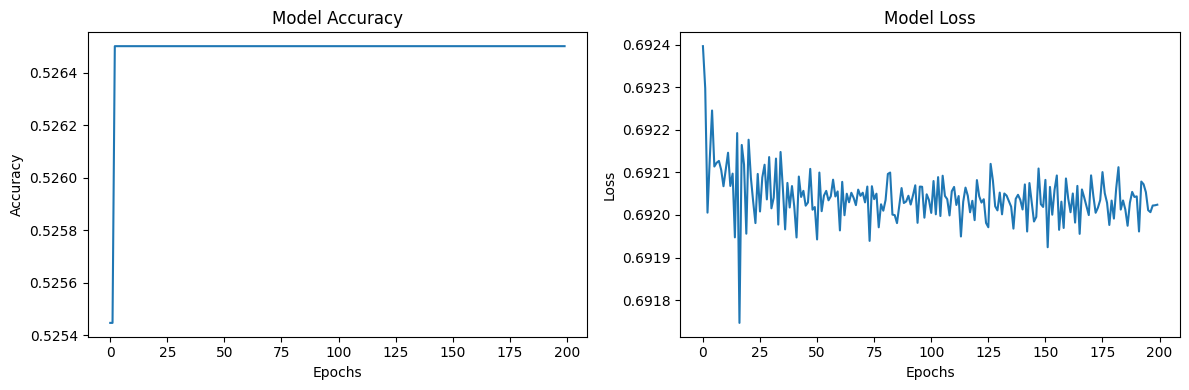

In [24]:
from model import accuracy_loss_plot
accuracy_loss_plot(history)

In [25]:
# from model import accuracy_loss_plot

# combined_history = {}
# for key in history.history.keys():
#     combined_history[key] = history.history[key] + history_after_whole_file.history[key] + history_after_whole_file_and_balanced.history[key]

    
# accuracy_loss_plot(combined_history, combined=True)

In [26]:
single_test_data = np.load("ml_processed_balanced_pre_ictal/chb01_03.edf_pre_ictal_data.npy")
single_test_labels = np.load("ml_processed_balanced_pre_ictal/chb01_03.edf_pre_ictal_labels.npy")
print(single_test_data.shape)

predictions = model.predict(single_test_data)

(80, 23, 256)
3/3 [==============================] - 0s 3ms/step


In [27]:
print(predictions)

[[[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]]

 [[0.48533663]

In [28]:
file = "chb03_01"
whole_file_data = np.load("ml_processed_pre_ictal/" + file + ".edf_pre_ictal_data.npy")
whole_file_labels = np.load("ml_processed_pre_ictal/" + file + ".edf_pre_ictal_labels.npy")
# whole_file_labels = np.load("ml_processed/chb04_08.edf_labels.npy")
# whole_file_labels = np.load("ml_processed/chb04_08.edf_labels.npy")

print(whole_file_data.shape)
predictions = model.predict(whole_file_data)

false_pos = 0
true_pos = 0
false_neg = 0
true_neg = 0
for i, prediction in enumerate(predictions):
    p = prediction[0][0]
    # if p == 1:
    if p > 0.65:
        if whole_file_labels[i] == 0:
            false_pos += 1
        else:
            true_pos += 1
    else:
        if whole_file_labels[i] == 1:
            false_neg += 1
        else:
            true_neg += 1

print("\t false", "\t", "true")
print("pos \t", false_pos, "\t", true_pos)
print("neg \t", false_neg, "\t", true_neg)

print("\nCorrect% =", ((true_pos + true_neg) / whole_file_data.shape[0]) * 100)

(3547, 23, 256)
111/111 [==============================] - 0s 2ms/step
	 false 	 true
pos 	 0 	 0
neg 	 39 	 3508

Correct% = 98.90047927826332


In [29]:
# from data import generate_pre_ictal_train_data
# generate_pre_ictal_train_data(256, 256 ,["chb15"],40)